In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
%matplotlib inline

# Getting Data

In [41]:
df=pd.read_csv('DS_airline_delay_causes.csv')

In [42]:
#dataset size
df.shape

(73282, 22)

In [43]:
#features
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [44]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN
2,2009,11,AS,Alaska Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",66.0,6.0,1.28,0.69,...,0.00,0.0,0.0,176.0,64.0,11.0,101.0,0.0,0.0,NaN
3,2009,11,AS,Alaska Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",59.0,10.0,0.24,0.00,...,0.56,0.0,0.0,553.0,8.0,0.0,526.0,0.0,19.0,NaN
4,2009,11,AS,Alaska Airlines Inc.,HNL,"Honolulu, HI: Daniel K Inouye International",85.0,18.0,1.34,1.46,...,0.00,0.0,0.0,547.0,85.0,89.0,373.0,0.0,0.0,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73282 entries, 0 to 73281
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 73282 non-null  int64  
 1    month               73282 non-null  int64  
 2   carrier              73282 non-null  object 
 3   carrier_name         73282 non-null  object 
 4   airport              73282 non-null  object 
 5   airport_name         73282 non-null  object 
 6   arr_flights          73240 non-null  float64
 7   arr_del15            73211 non-null  float64
 8   carrier_ct           73240 non-null  float64
 9    weather_ct          73240 non-null  float64
 10  nas_ct               73240 non-null  float64
 11  security_ct          73240 non-null  float64
 12  late_aircraft_ct     73240 non-null  float64
 13  arr_cancelled        73240 non-null  float64
 14  arr_diverted         73240 non-null  float64
 15   arr_delay           73240 non-null 

In [46]:
#cleaning white space from columns name
df.rename(columns={' month':'month',' weather_ct':'weather_ct',' arr_delay':'arr_delay',' carrier_delay':'carrier_delay'},inplace=True)


# Features Descriptions

* year : Year
* month : Month
* carrier : The airline's code
* carrier_name : The airline's full name
* airport : The airport's code
* airport_name: The airport's full name, including "city & state & name of airport"
* arr_flights : Number of flights arriving at airport
* arr_del15 : Number of flights more than 15 minutes late
    * carrier_ct : Number of flights delayed due to air carrier. (e.g. no crew)
    * weather_ct : Number of flights delayed due to weather
    * nas_ct: Number of flights delayed due to National Aviation System (e.g. heavy air traffic)
    * security_ct : Number of flights delayed due to a security breach
    * late_aircraft_ct : Number of flights delayed as a result of another flight on the same aircraft delayed
* arr_cancelled : Number of cancelled flights
* arr_diverted : Number of flights that were diverted
* arr_delay : Total time (minutes) of delayed flight
    * carrier_delay : Total time (minutes) of delay due to air carrier
    * weather_delay : Total time (minutes) of delay due to inclement weather
    * nas_delay : Total time (minutes) of delay due to National Aviation System
    * security_delay : Total time (minutes) of delay as a result of a security issue
    * late_aircraft_delay : Total time (minutes) of delay flights as a result of a previous flight on the same airplane being late

In [47]:
#Descriptive statistics of dataset 
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,73282.000000,73282.000000,73240.000000,73211.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,73240.000000,0.0
mean,2011.191684,6.576499,993.874235,191.557594,46.916813,6.167805,74.535534,0.430516,63.431131,18.667955,2.305380,11335.262807,3059.317873,527.980093,3592.494866,17.295330,4138.167695,NaN
std,5.083600,3.446558,1854.978795,362.768908,80.788101,16.563787,162.961171,1.406218,135.432397,69.355569,7.276267,23121.325039,6159.240736,1505.558172,9061.308550,63.384061,8986.566307,NaN
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,NaN
25%,2007.000000,4.000000,124.000000,24.000000,7.510000,0.000000,7.737500,0.000000,4.350000,0.000000,0.000000,1216.000000,374.000000,0.000000,288.000000,0.000000,246.000000,NaN
50%,2011.000000,7.000000,331.000000,68.000000,19.920000,1.400000,23.880000,0.000000,15.750000,3.000000,0.000000,3580.000000,1079.000000,91.000000,952.000000,0.000000,996.000000,NaN
75%,2016.000000,10.000000,866.000000,175.000000,48.400000,5.400000,66.050000,0.090000,51.310000,12.000000,2.000000,9927.000000,2836.000000,425.000000,2878.250000,4.000000,3429.000000,NaN
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000,NaN


# Data Cleaning - Dealing with missing values

In [48]:
#drop 
df=df.drop('Unnamed: 21',axis=1)

In [49]:
#count of missing values
np.sum(df.isna())

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            42
arr_del15              71
carrier_ct             42
weather_ct             42
nas_ct                 42
security_ct            42
late_aircraft_ct       42
arr_cancelled          42
arr_diverted           42
arr_delay              42
carrier_delay          42
weather_delay          42
nas_delay              42
security_delay         42
late_aircraft_delay    42
dtype: int64

In [50]:
#rows containing missing value
df[df.isna().any(axis=1)]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
981,2010,1,OO,SkyWest Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,2019,3,EV,ExpressJet Airlines Inc.,PHL,"Philadelphia, PA: Philadelphia International",1.0,NaN,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6915,2012,9,F9,Frontier Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7214,2012,10,F9,Frontier Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12623,2003,9,RU,ExpressJet Airlines Inc.,TPA,"Tampa, FL: Tampa International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69589,2007,11,EV,Atlantic Southeast Airlines,MDW,"Chicago, IL: Chicago Midway International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70004,2007,12,EV,Atlantic Southeast Airlines,JFK,"New York, NY: John F. Kennedy International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70998,2009,7,UA,United Air Lines Inc.,MIA,"Miami, FL: Miami International",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71686,2016,9,EV,ExpressJet Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#drop rows containing missing value
df.dropna(inplace=True,axis=0)

# Feature extraction

In [52]:
# Extract city and sate
df['city_state']=df['airport_name'].agg(lambda x:x.split(':')[0])
df['city']=df['city_state'].agg(lambda x:x.split(',')[0])
df['state']=df['city_state'].agg(lambda x:x.split(',')[1])

In [53]:
# Include date as year-month format
df['year_month']=df['year'].astype(str)+'-'+df['month'].astype(str)
df['year_month']=pd.to_datetime(df['year_month']).dt.strftime('%Y-%m')

In [54]:
df.to_csv('df_clean_zerog.csv')

In [55]:
df['del_avg_dur']=df['arr_delay']/df['arr_del15']

In [56]:
np.sum(df.del_avg_dur.isna())

928

In [57]:
df.fillna(0,inplace=True)

In [65]:
df.to_csv('df_clean.csv',index=False)

# Dealing with Outliers

In [19]:
#Descriptive statistics of dataset Average delay (minutes) per flight
df['del_avg_dur'].describe()

count    73211.000000
mean        54.284136
std         20.432435
min          0.000000
25%         43.395180
50%         52.600000
75%         63.055770
max       1399.000000
Name: del_avg_dur, dtype: float64

In [20]:
#maximum average delay (minutes) per flight
df.iloc[np.argmax(df['del_avg_dur']),:]

year                                                        2017
month                                                         10
carrier                                                       EV
carrier_name                            ExpressJet Airlines Inc.
airport                                                      MDW
airport_name           Chicago, IL: Chicago Midway International
arr_flights                                                  5.0
arr_del15                                                    1.0
carrier_ct                                                   1.0
weather_ct                                                   0.0
nas_ct                                                       0.0
security_ct                                                  0.0
late_aircraft_ct                                             0.0
arr_cancelled                                                0.0
arr_diverted                                                 0.0
arr_delay                

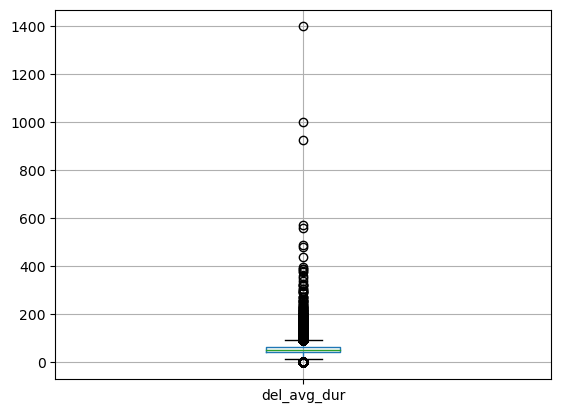

In [21]:
#box and whisker plot of average delay (minutes) per flight
df.boxplot(column=['del_avg_dur']);

''

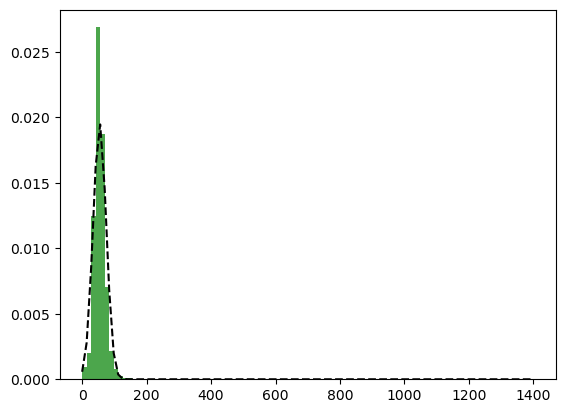

In [22]:
#Histogram of average delay (minutes) per flight

n, bins, patches=plt.hist(df['del_avg_dur'],bins=100,density = 1, color ='green',alpha = 0.7)
mu = np.mean(df['del_avg_dur'] )
sigma = np.std(df['del_avg_dur'])
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
plt.plot(bins, y, '--', color ='black')
;

In [23]:
#Zscore method
out_low=df[stats.zscore(df['del_avg_dur'])<-3]
out_high=df[stats.zscore(df['del_avg_dur'])>3]


In [24]:
out_low.shape

(0, 26)

In [25]:
out_high.shape

(526, 26)

In [26]:
#drop outlier from data set based on average delay per flight
df_wout=df.drop(out_high.index,axis=0)

In [27]:
df_wout.shape

(72685, 26)

In [28]:
df.shape

(73211, 26)

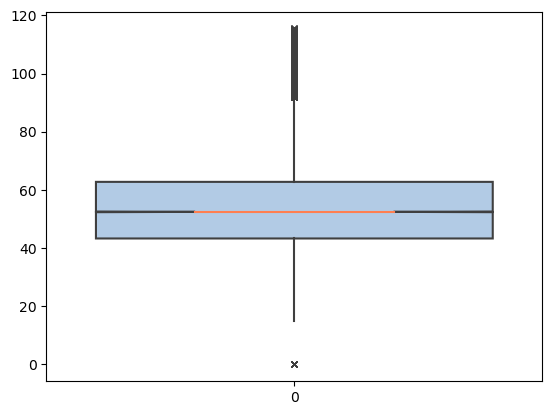

In [29]:
sns.boxplot(
    data=df_wout['del_avg_dur'],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
);

''

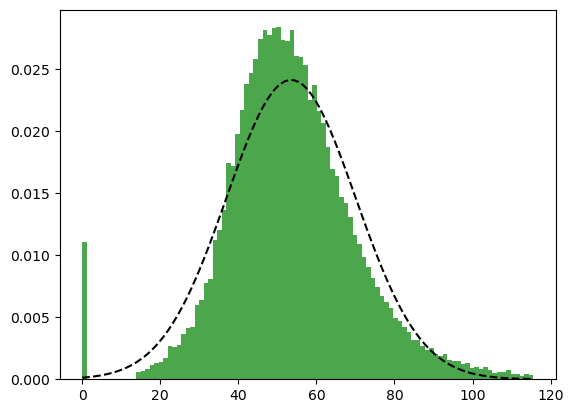

In [30]:
#Distribution of observations based on average delay per flight after dropping outliers
#It seems normal
n, bins, patches=plt.hist(df_wout['del_avg_dur'],bins=100,density = 1, color ='green',alpha = 0.7)
mu = np.mean(df_wout['del_avg_dur'] )
sigma = np.std(df_wout['del_avg_dur'])
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
plt.plot(bins, y, '--', color ='black')
;


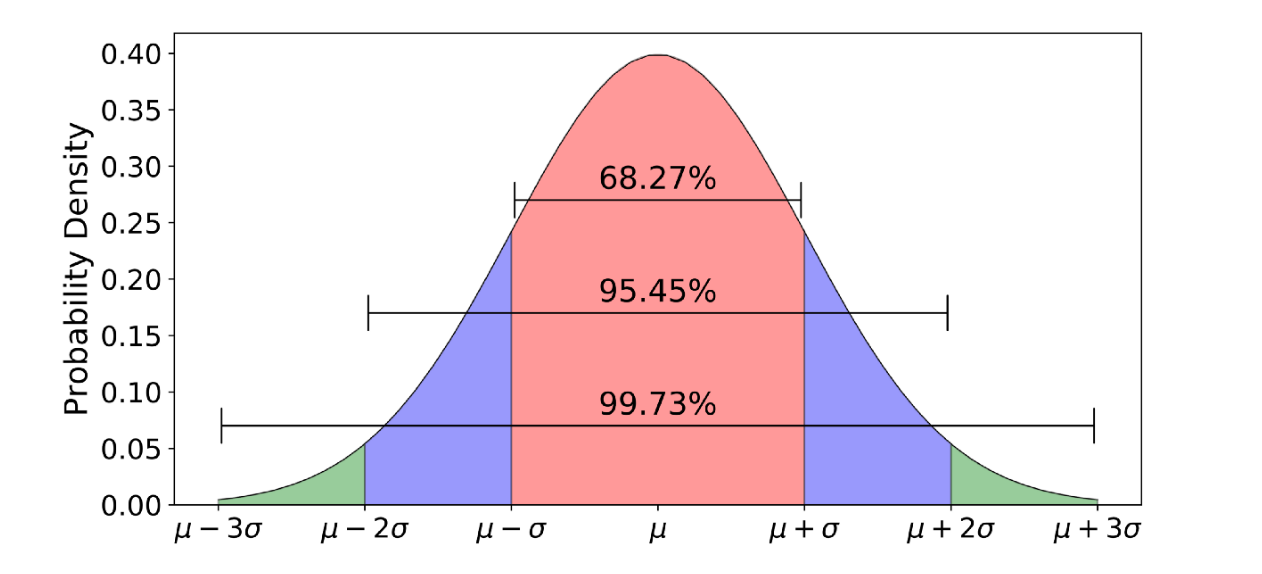

In [31]:
#Test normal distribution of average delay per flight
k2, p_value = stats.normaltest(df_wout['del_avg_dur'])
alpha=0.05
if p_value < alpha:
    print("The null hypothesis can be rejected - x comes from a normal distribution ")
else:
    print("The null hypothesis cannot be rejected - x is not normally distributed")

The null hypothesis can be rejected - x comes from a normal distribution 


# Define classes based on mean and standard deviation
* short = delay less than or equal to mean-std (36 min)
* medium = delay between mean-std and mean+std (36 - 70)
* long = delay greater than mean+std (70 min)


In [32]:
m_del=np.mean(df_wout.del_avg_dur)
m_del

53.51309270027202

In [33]:
s_del=np.std(df_wout.del_avg_dur)
s_del

16.538740744185514

In [34]:
m_del-1*s_del

36.97435195608651

In [35]:
m_del+1*s_del

70.05183344445753

In [36]:
del_clas_desc={
'short' : 'delay less than or equal to 36 min',
'medium' : 'delay between 36.1 and 70',
'long' : 'delay greater than 70.1'
}

In [37]:
df_wout['del_class']=df_wout['del_avg_dur'].agg(lambda x: 'short' if x<=36 else('medium' if x<=70 else 'long'))

In [38]:
df_wout.to_csv('df_wout.csv')